In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
#loading mnist data from keras datasets
(X_train,y_train),(X_test,y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Data = 60000 Images

Testing Data = 10000 Images


Image dimension ----> 28 * 28

grayscale image --->1 channel

In [6]:
print(X_train[10].shape)

(28, 28)


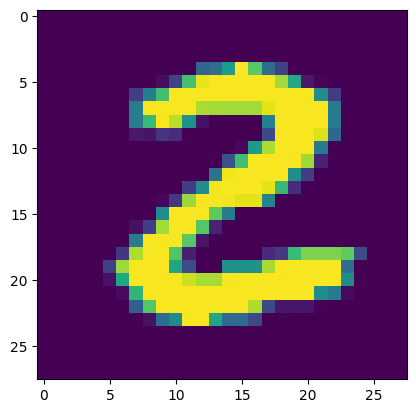

2


In [7]:
#displaying the image
plt.imshow(X_train[25])
plt.show()

#print the corresponding label
print(y_train[25])

Image Labels

In [8]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [9]:
#unique values in y_train
print(np.unique(y_train))

#unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
#scaling the values
X_train = X_train/255
X_test = X_test/255

In [11]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building Neural Network

In [12]:
#setting layers of neural network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')
])

In [13]:
#compiling neural network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
#training the neural network
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 1ms/step - loss: 0.2953 - accuracy: 0.9145
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1394 - accuracy: 0.9578
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1041 - accuracy: 0.9680
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0844 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0695 - accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0601 - accuracy: 0.9812
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0509 - accuracy: 0.9844
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0468 - accuracy: 0.9848
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0398 - accuracy: 0.9869
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.035

# Training data accuracy = 98.87

Testing data accuracy

In [15]:
loss,accuracy = model.evaluate(X_test,y_test)
print(accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.0946 - accuracy: 0.9752
0.9751999974250793


Testing data accuracy = 97.52

In [16]:
print(X_test.shape)

(10000, 28, 28)


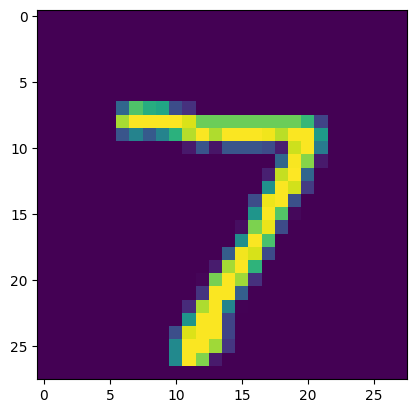

In [17]:
plt.imshow(X_test[0])
plt.show()

In [18]:
print(y_test[0])

7


In [19]:
y_pred = model.predict(X_test)

313/313 [==============================] - 0s 974us/step


In [20]:
print(y_pred.shape)

(10000, 10)


In [22]:
print(y_pred[0])

[8.6061971e-04 7.1693603e-03 3.4517698e-02 9.9805075e-01 1.6620410e-07
 2.5932759e-03 5.7923908e-13 9.9999964e-01 3.5684195e-01 5.7259485e-02]


model.predict() gives the prediction probability of each class for that data point

In [23]:
# converting the prediction probabilities to class label
label_for_first_text_image = np.argmax(y_pred[0])
print(label_for_first_text_image)

7


In [24]:
# converting the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test  -->  True labels

Y_pred_labels  -->  Predicted Labels

confusion matrix

In [25]:
conf_mat = confusion_matrix(y_test,y_pred_labels)

In [26]:
print(conf_mat)

tf.Tensor(
[[ 968    0    1    1    1    3    2    1    3    0]
 [   0 1126    3    0    0    2    1    1    2    0]
 [   3    1 1008    2    0    1    1    8    8    0]
 [   0    0    6  972    0   15    0    6    8    3]
 [   0    1    5    0  958    0    5    1    0   12]
 [   0    0    0    7    2  870    4    0    6    3]
 [   4    3    1    1    1   10  933    0    5    0]
 [   1    7   11    1    0    0    0 1003    1    4]
 [   3    0    1    6    4    8    0    5  943    4]
 [   4    2    0    4   10    5    0    8    5  971]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted label')

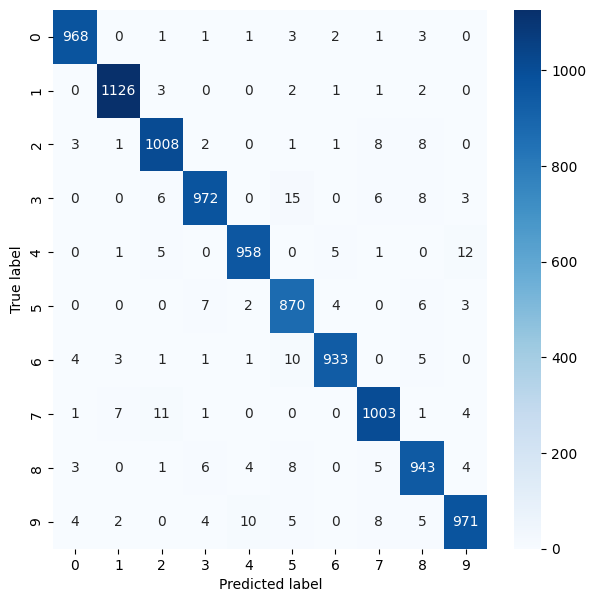

In [30]:
plt.figure(figsize=(7,7))
sns.heatmap(conf_mat, annot=True, fmt='d' ,cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Building a predictive system

In [31]:
img = cv2.imread('/content/MNIST_digit.png')

In [ ]:
print(img)

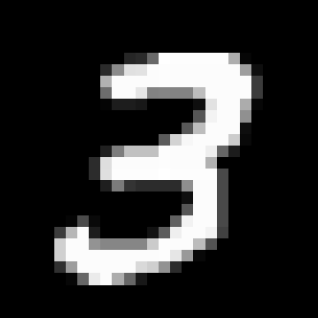

In [34]:
cv2_imshow(img)

In [35]:
img.shape

(318, 318, 3)

In [36]:
grayscale = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [37]:
grayscale.shape

(318, 318)

In [38]:
img_resize = cv2.resize(grayscale,(28,28))

In [39]:
img_resize.shape

(28, 28)

In [40]:
cv2_imshow(img_resize)

In [41]:
img_resize = img_resize/255

In [42]:
img_reshaped = np.reshape(img_resize,[1,28,28])

In [43]:
input_prediction = model.predict(img_reshaped)

1/1 [==============================] - 0s 19ms/step


In [44]:
print(input_prediction)

[[1.9463829e-07 1.6234826e-02 3.5302937e-02 1.0000000e+00 1.5912353e-10
  2.3803435e-01 6.6043048e-12 1.0579233e-03 5.0380939e-01 2.8701201e-02]]


In [45]:
input_pred_label = np.argmax(input_prediction)

In [46]:
print(input_pred_label)

3


Predictive system

Path of the image to be predicted:/content/MNIST_digit.png


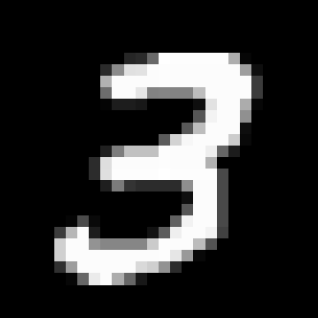

1/1 [==============================] - 0s 16ms/step
The handwrittern digit is recognized as 3


In [48]:
img_path = input('Path of the image to be predicted:')
img = cv2.imread(img_path)
cv2_imshow(img)
grayscale = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img_resize = cv2.resize(grayscale,(28,28))
img_resize = img_resize/255
img_reshaped = np.reshape(img_resize,[1,28,28])
input_prediction = model.predict(img_reshaped)
input_pred_label = np.argmax(input_prediction)
print("The handwrittern digit is recognized as",input_pred_label)
